## Assignment 4: Obsevational Studies and Applied ML

### Deadline
November 21st,11:59PM

### Important notes

Make sure you push on GitHub your notebook with all the cells already evaluated. Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented. Back up any hypotheses and claims with data, since this is an important aspect of the course. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.

Use this legendary link to create your repository: [link](https://classroom.github.com/g/YXtsr0QK)

In [34]:
# Put your imports here
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from scipy.stats import pearsonr

%matplotlib inline

In [35]:
data_folder = './data/'

## Task 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Hint: It is useful to add a notion of confidence to your results and explore the data visually. You are allowed to use the SciPy library.

In [36]:
data = pd.read_csv(data_folder + 'acs2015_county_data.csv', index_col=1)
data = data.reset_index()

We see that the income per capita increase the most when self employement increase.

# Question
A) Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

In [37]:
corrIncomePerCap, p_value = pearsonr(data["SelfEmployed"], data["IncomePerCap"])
corrIncomePerCapErr, p_value = pearsonr(data["SelfEmployed"], data["IncomePerCapErr"])

print('Correlation between Self Employed and Income per capita: ' + 
      str(corrIncomePerCap))
print('Correlation between Self Employed and Income per capita Err: ' + 
      str(corrIncomePerCapErr))

Correlation between Self Employed and Income per capita: 0.08727386609551786
Correlation between Self Employed and Income per capita Err: 0.46076316843475046


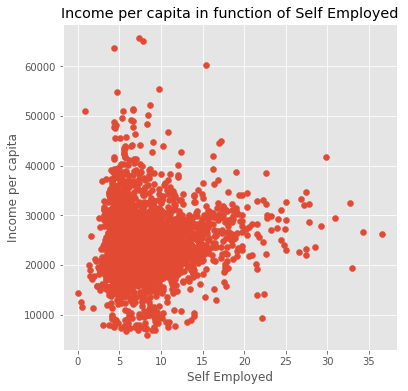

In [38]:
#Displaying Self Employed in function of the Income per cap
plt.figure(figsize=(6,6))
plt.scatter(data["SelfEmployed"], data["IncomePerCap"])

matplotlib.style.use('ggplot')
plt.title('Income per capita in function of Self Employed')
plt.ylabel('Income per capita')
plt.xlabel('Self Employed')
plt.show()

# Answer
When focusing our analysis on this graph, we could affirme that citizens in counties that have a higher percentage of self-employed doesn't ear more per capita. We cannot see a real correlation between these two variables. 
#### However, thanks to the linear regression analysis below, we can detect something interesting...

### Using machine learning
Let's look at the income per capita in function of the different kinds of work, 'SelfEmployed', 'PrivateWork', 'PublicWork' to see which has the highest impact on the income per capita

In [39]:
#focusing analysis on the following columns:
feature_cols = ['SelfEmployed', 'PrivateWork', 'PublicWork']
X = data[feature_cols]
y = data['IncomePerCap']
logistic = LinearRegression()  # create the model
logistic.fit(X, y)  # train it
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(logistic.coef_[f], feature_cols[f]))
print(logistic.intercept_)

349.666847457036 * SelfEmployed + 
184.0827380238902 * PrivateWork + 
-90.3496394517154 * PublicWork + 
9132.401275604407


# More interesting answer
Contrary to the graph that doesn't show any correlation, the linear regression analysis detects that the income per capita increase the most when self employement increase! This analysis shows that self employement has the strongest impact.

# Question
B) Quantify the dependency of per-capita income on self-employment rates across all the counties in set A: Wisconsin, Tennessee, and Minnesota. 

In [40]:
set_A = data.loc[(data['State'] == 'Tennessee') |  (data['State'] == 'Wisconsin') |  (data['State'] == 'Minnesota')]
#Verifying we have only selected the counties in set A
set_A.State.unique()

array(['Minnesota', 'Tennessee', 'Wisconsin'], dtype=object)

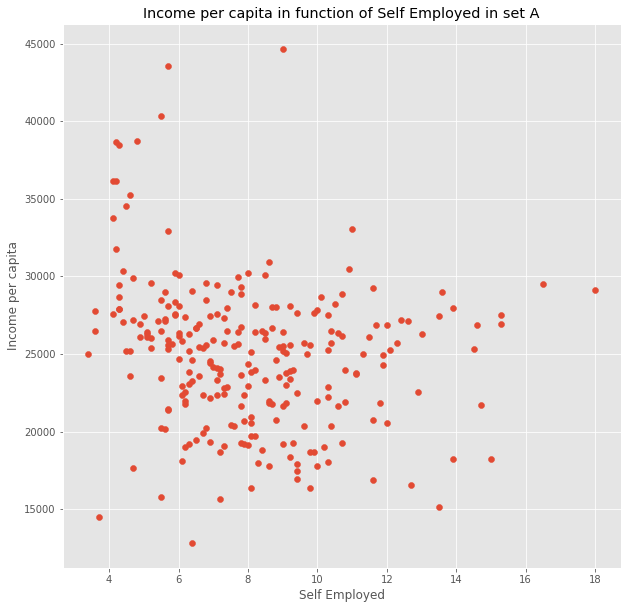

In [41]:
#Displaying Self Employed in function of the Income per cap
plt.figure(figsize=(10,10))
plt.scatter(set_A["SelfEmployed"], set_A["IncomePerCap"])

matplotlib.style.use('ggplot')
plt.title('Income per capita in function of Self Employed in set A')
plt.ylabel('Income per capita')
plt.xlabel('Self Employed')
plt.show()

Once again, a "basic" analysis doesn't allow to detect anything. No obvious correlation can be found thanks to this graph.

In [42]:
feature_cols = ['SelfEmployed', 'PrivateWork', 'PublicWork']
X = set_A[feature_cols]
y = set_A['IncomePerCap']
logistic = LinearRegression()  # create the model
logistic.fit(X, y)  # train it
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(logistic.coef_[f], feature_cols[f]))
print(logistic.intercept_)

-1310.9704748787806 * SelfEmployed + 
-971.710093985848 * PrivateWork + 
-1395.1211412438645 * PublicWork + 
130718.27312373924


# Answer
Thanks to the linear regression analysis, we can see the impact of each kind of work on the income per cap. We can now affirm that, in the set A, self employed and public work have almost the same impact on the income per cap.

# Question
C) In which state within set A is the observed effect of self-employment on per-capita income the strongest?

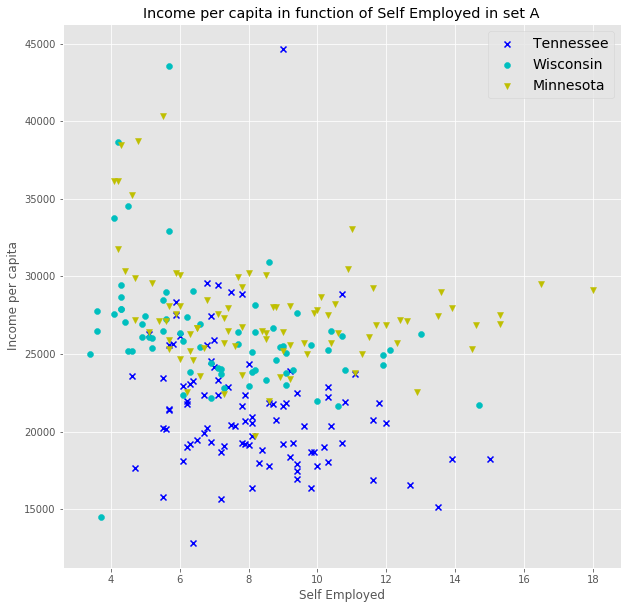

In [43]:
plt.figure(figsize=(10,10))

#Displaying Income per capita in function of Self Employed for each county in different colors
colors = ['b', 'c', 'y']
Ten = plt.scatter(set_A.loc[(data['State'] == 'Tennessee')]["SelfEmployed"], set_A.loc[(data['State'] == 'Tennessee')]["IncomePerCap"], marker='x', color=colors[0])
Wis = plt.scatter(set_A.loc[(data['State'] == 'Wisconsin')]["SelfEmployed"], set_A.loc[(data['State'] == 'Wisconsin')]["IncomePerCap"], marker='o', color=colors[1])
Min = plt.scatter(set_A.loc[(data['State'] == 'Minnesota')]["SelfEmployed"], set_A.loc[(data['State'] == 'Minnesota')]["IncomePerCap"], marker='v', color=colors[2])

matplotlib.style.use('ggplot')
plt.title('Income per capita in function of Self Employed in set A')
plt.ylabel('Income per capita')
plt.xlabel('Self Employed')
plt.legend((Ten, Wis, Min),
           ('Tennessee', 'Wisconsin', 'Minnesota'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=14)
plt.show()

A "basic" analysis doesn't help to find any obvious correlation between our two variables. We cannot detect especially difference between these three states, expect about the average income per cap (Minnesota > Wisconsin > Tennessee). That is not enough for what we want.

In [44]:
feature_cols = ['SelfEmployed', 'PrivateWork', 'PublicWork']
counties = ['Tennessee', 'Wisconsin', 'Minnesota']
for county in counties:
    print("Results for {0}:".format(county))
    county_data = set_A.loc[(data['State'] == county)]
    X = county_data[feature_cols]
    y = county_data['IncomePerCap']
    logistic = LinearRegression()  # create the model
    logistic.fit(X, y)  # train it
    for f in range(len(feature_cols)):
        print("{0} * {1} + ".format(logistic.coef_[f], feature_cols[f]))
    print(logistic.intercept_)
    print("")

Results for Tennessee:
247.37724962352505 * SelfEmployed + 
669.0130399170622 * PrivateWork + 
264.3568981995383 * PublicWork + 
-35367.661728143205

Results for Wisconsin:
-328.8386768449827 * SelfEmployed + 
168.3740708723915 * PrivateWork + 
-112.6826024333683 * PublicWork + 
16867.40328991205

Results for Minnesota:
170.06704080501547 * SelfEmployed + 
412.0298197120534 * PrivateWork + 
169.60969064451388 * PublicWork + 
-8143.029710383733



# Answer
Once again, linear regression allow us to find more detail on the impact of each kind of work (self, public and private). In the Wisconsin, the impact of the self employed is strongly negative (in comparison with private work and public work). In the two other states, self employed and public work have the same impact. 

In the three counties, the private work has the most impact, self employed has an average impact in the Tennessee and in the Minnesota. It would be better to increase private work to increase the income per cap for these states.

# Question
D) Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

In [45]:
set_B = data.loc[(data['State'] == 'New Jersey') |  (data['State'] == 'Kansas') |  (data['State'] == 'Rhode Island')]
#Verifying we have only selected the counties in set B
set_B.State.unique()

array(['Kansas', 'New Jersey', 'Rhode Island'], dtype=object)

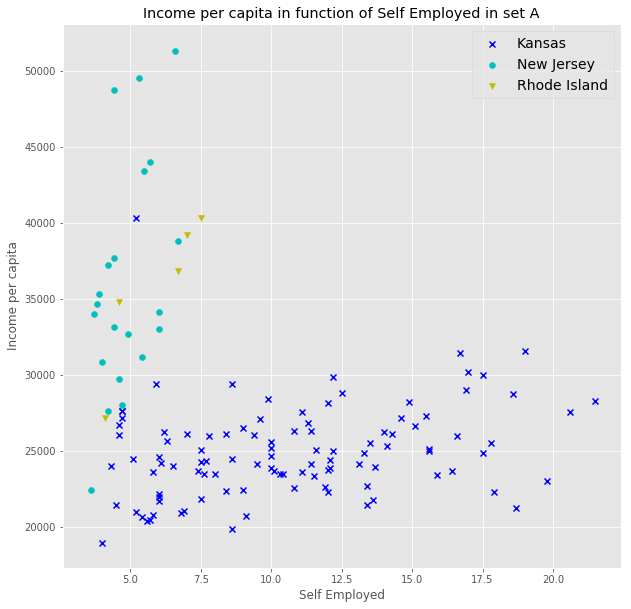

In [46]:
plt.figure(figsize=(10,10))
colors = ['b', 'c', 'y']
Kansas = plt.scatter(set_B.loc[(data['State'] == 'Kansas')]["SelfEmployed"], set_B.loc[(data['State'] == 'Kansas')]["IncomePerCap"], marker='x', color=colors[0])
NewJersey = plt.scatter(set_B.loc[(data['State'] == 'New Jersey')]["SelfEmployed"], set_B.loc[(data['State'] == 'New Jersey')]["IncomePerCap"], marker='o', color=colors[1])
RhodeIsland = plt.scatter(set_B.loc[(data['State'] == 'Rhode Island')]["SelfEmployed"], set_B.loc[(data['State'] == 'Rhode Island')]["IncomePerCap"], marker='v', color=colors[2])

matplotlib.style.use('ggplot')
plt.title('Income per capita in function of Self Employed in set A')
plt.ylabel('Income per capita')
plt.xlabel('Self Employed')
plt.legend((Kansas, NewJersey, RhodeIsland),
           ('Kansas', 'New Jersey', 'Rhode Island'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=14)
plt.show()

In [47]:
feature_cols = ['SelfEmployed', 'PrivateWork', 'PublicWork']
counties = ['Kansas', 'New Jersey', 'Rhode Island']
for county in counties:
    print("Results for {0}:".format(county))
    county_data = set_B.loc[(data['State'] == county)]
    X = county_data[feature_cols]
    y = county_data['IncomePerCap']
    logistic = LinearRegression()  # create the model
    logistic.fit(X, y)  # train it
    for f in range(len(feature_cols)):
        print("{0} * {1} + ".format(logistic.coef_[f], feature_cols[f]))
    print(logistic.intercept_)
    print("")

Results for Kansas:
-659.2026971616359 * SelfEmployed + 
-824.8900947872619 * PrivateWork + 
-853.3876422131817 * PublicWork + 
105910.51088620965

Results for New Jersey:
7272.403195871635 * SelfEmployed + 
3617.0073315727304 * PrivateWork + 
2513.804811265161 * PublicWork + 
-326548.7519278034

Results for Rhode Island:
-10855.16043072763 * SelfEmployed + 
-13092.672716290883 * PrivateWork + 
-12830.240978388625 * PublicWork + 
1326317.6317395917



# Answer
Thanks to the linear regression, we found interesting results! In the set B, we can clearly see that the self employed has the best impact on each county, especially in New Jersey! We would hardly recommend incentivizing self-employment for the set B. According the 2.C results, we would recommend incentivizing Private work for the set A.

Indeed, in the set A, private work dominates self employed and public work in each county. Contrary to the set A, in the set B, it's self employed that dominates the others!

These Task 1's results show that we cannot base strategies (here incentivizing self employed) on a sample of states. Even if we pick randomly sets, each set could lead to different results. We would suggest to base strategies locally per state instead of doing a global one for the whole country. A such strategy would have positive and negative effects depending on the state.

## Task 2: All you need is love… And a dog!

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

**A)** Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

**B)** Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

**D)** Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

You are allowed to use the scikit-learn library to implement your classifiers.

# Answer 
A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

Load data set

In [48]:
data = pd.read_csv(data_folder + 'aac_intakes_outcomes.csv', index_col=0)
data = data.reset_index()

In [49]:
data.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


Split between the features X, and the outcome y (adoption or not)

In [50]:
feature_cols = ['animal_type','intake_year','intake_condition','intake_number','intake_type','sex_upon_intake',\
                'age_upon_intake_(years)','time_in_shelter_days','sex_upon_outcome','age_upon_outcome_(years)']
results_col = 'outcome_type'

X=data[feature_cols]
y = data[results_col]
X.head()

,animal_type,intake_year,intake_condition,intake_number,intake_type,sex_upon_intake,age_upon_intake_(years),time_in_shelter_days,sex_upon_outcome,age_upon_outcome_(years)
0,Dog,2017,Normal,1.0,Stray,Neutered Male,10.0,0.588194,Neutered Male,10.0
1,Dog,2014,Normal,2.0,Public Assist,Neutered Male,7.0,1.259722,Neutered Male,7.0
2,Dog,2014,Normal,3.0,Public Assist,Neutered Male,6.0,1.113889,Neutered Male,6.0
3,Dog,2014,Normal,1.0,Owner Surrender,Neutered Male,10.0,4.970139,Neutered Male,10.0
4,Dog,2013,Injured,1.0,Public Assist,Neutered Male,16.0,0.119444,Neutered Male,16.0


Transform the data in numeric form, the already numerical data won't change. The categorical values will be split in different columns with binary value. For example the column 'animal_type' is transformed into 4 columns, 'animal_type_Bird', 'animal_type_Cat' ... with a 1 in the corresponding one.

y is also transformed 1 if adopted 0 otherwise.

In [51]:
X_num = pd.get_dummies(X)
y = y.map(lambda x: 1 if x=='Adoption' else 0)
X_num.head()

,intake_year,intake_number,age_upon_intake_(years),time_in_shelter_days,age_upon_outcome_(years),animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,...,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
0,2017,1.0,10.0,0.588194,10.0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2014,2.0,7.0,1.259722,7.0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2014,3.0,6.0,1.113889,6.0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,2014,1.0,10.0,4.970139,10.0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,2013,1.0,16.0,0.119444,16.0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [52]:
#split the data, about 80% for traing and 20% for testing
msk = np.random.rand(len(X_num)) < 0.8
X_train = X_num[msk]
y_train = y[msk]

X_test = X_num[~msk]
y_test = y[~msk]
print('Size of training data: {}\nSize ot testing data: {}'.format(len(X_train), len(X_test)))

Size of training data: 63847
Size ot testing data: 15825


Get the mean and the std from the training set to do the standardization of the data. As good practice the mean and std must be only computed from the training set.

In [53]:
means = X_train.mean()
std = X_train.std()

Standardize the training and testing sets

In [54]:
X_train_st = (X_train - means) / std
X_test_st = (X_test - means) / std

# Answer
B) Train a logistic regression classifier on your training set.

Create and train a logistic classifier. By setting the solver to 'liblinear' we make sure that the outcome is not multinomial. Obviously we train it using the training and testing sets.

In [55]:
logistic = LogisticRegression(solver='liblinear').fit(X_train_st, y_train)

Compute the confusion matrix of our model in function of the threshold. First, we get the prediction, for that we need to look at the probability of predicting class 1 and compare it with the value of the threshold. logistic.predict infer a threshold of 0.5.

Then the numbers of true/false, positive/negative are computed.
Finally, we return the confusion matrix in the form of a dictionary.

In [56]:
def conf_matrix(predictions, true_y):
    true_positive = np.sum((predictions==1) & (true_y==1))
    true_negative = np.sum((predictions==0) & (true_y==0))
    false_positive = np.sum((predictions==1) & (true_y==0))
    false_negative = np.sum((predictions==0) & (true_y==1))
    
    return {'true_positive':true_positive, 'true_negative':true_negative,\
            'false_positive':false_positive, 'false_negative':false_negative}


def get_confusion_matrix(X, y, threshold, model):
    predictions = logistic.predict_proba(X)[:,1]
    predictions[predictions<=threshold] = 0
    predictions[predictions>threshold] = 1
    return conf_matrix(predictions, y)



Compute with the following formulae the accuracy, recall, precision and F1 score of our model.

\begin{equation*}
accuracy = \frac{TP + TN}{N}
\end{equation*}

\begin{equation*}
recall = \frac{TP}{TP + FN} = \frac{TP}{N_{true}}
\end{equation*}

\begin{equation*}
precision = \frac{TP}{TP + FP}
\end{equation*}

\begin{equation*}
F1 = 2 \cdot \frac{recall \cdot precision}{recall + precision}
\end{equation*}


TP = number of True Positive

TN = number of True Negative

FP = number of False Positive

FN = number of False Negative

N = size of the data (number of rows)

In [57]:
def get_performance(X, y, threshold, model):
    N=len(y)
    N_true = np.sum(y)
    
    conf_matrix=get_confusion_matrix(X, y, threshold, model)
    
    accuracy = (conf_matrix['true_positive'] + conf_matrix['true_negative']) / N
    # Check to avoid division by 0
    if conf_matrix['true_positive'] == 0:
        return {'accuracy': accuracy, 'precision': 0, 'recall': 0, 'F1': 0}
    recall = (conf_matrix['true_positive']) / N_true
    precision = conf_matrix['true_positive'] / (conf_matrix['true_positive']+conf_matrix['false_positive'])
    F1 = 2 * recall * precision / (recall + precision)
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'F1': F1}

See the results of the confusion matrix and the different metrics for a typical threshold of 0.5

In [58]:
get_confusion_matrix(X_test_st, y_test, threshold=0.5, model=logistic)

{'true_positive': 5483,
 'true_negative': 7576,
 'false_positive': 1599,
 'false_negative': 1167}

In [59]:
get_performance(X_test_st, y_test, threshold=0.50, model=logistic)

{'accuracy': 0.82521327014218,
 'precision': 0.7742163230725784,
 'recall': 0.8245112781954888,
 'F1': 0.7985726769589281}

Get the F1, accuracy, precision and recall scores in function of the threshold

In [60]:
#do the graph
F1_s = []
accuracy_s = []
precision_s = []
recall_s = []
#compute for 101 threshold values between 0 and 1 (0.01 steps)
thresholds = np.linspace(0,1,101)
for threshold in thresholds:
    results = get_performance(X_test_st, y_test, threshold=threshold, model= logistic)
    F1_s += [results['F1']]
    accuracy_s += [results['accuracy']]
    precision_s += [results['precision']]
    recall_s += [results['recall']]
    

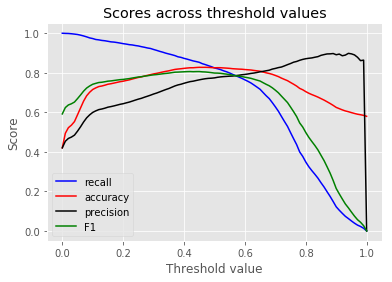

In [61]:
plt.plot(thresholds, recall_s, 'b')
plt.plot(thresholds, accuracy_s, 'r')
plt.plot(thresholds, precision_s,'black')
plt.plot(thresholds, F1_s,'g')

plt.legend(['recall', 'accuracy', 'precision', 'F1'])
plt.xlabel('Threshold value')
plt.ylabel('Score')
plt.title('Scores across threshold values')
plt.show()

##### Observations:

The recall is constantly decreasing as increasing the threshold increase the risk of false negative.

The precision is generally increasing with the threshold. At the beginning, increasing the threshold mostly remove false positive, but when the threshold is too high and start to remove the true positive results. When the threshold is 1, there is no true or false positive and we end up with 0/0. To avoid it, we define the recall to be 0 when the number of true positive is 0.


#### Question: 
The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why?

#### Answer

As the shelter needs to kill dogs, we want at least to be sure that we don't kill a dog that would have been adopted. In other word we need to minimize the number of false negative.
Therefore, we need to maximize the <u>Recall</u>. 

As the recall is trivially maximum for a threshold of 0, we need to increase the threshold until we have the desired number of negative results.

**Remark:** If the goal of the shelter is to keep only the dogs with a high probability to be adopted (to reduce the cost the most) the <u>Precision </u> should now be the metric to maximize.

# Answer
C) Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

In [62]:
steps = [1,5,10,15,20,25,30]
result = []
for k in steps:
    selector = RFE(logistic, k, step=1)
    selector = selector.fit(X_train_st,y_train,)
    
    
    X_k = X_train_st.values[:,selector.support_ ]
    
    result.append(np.mean(cross_val_score(selector,X_k,y_train ,cv=5)))



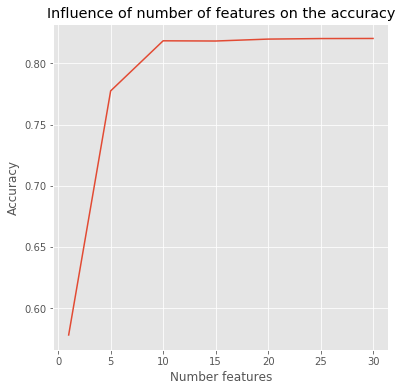

In [63]:
plt.figure(figsize=(6,6))
plt.plot(steps,result)
plt.xlabel('Number features')
plt.ylabel('Accuracy')
plt.title('Influence of number of features on the accuracy')
plt.show()

##### Observations:

We can see above that after k=10 features the accuracy is not improving very much. Doubling the number of features only increase the accuracy by 1-2%. Computationaly, it is more interessant to have the 10 features.



# Answer
D) Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

You are allowed to use the scikit-learn library to implement your classifiers.

In [64]:
score_list = []
for k in range(1,100,10):
    randForest = RandomForestClassifier(n_estimators=k)
    randForest = randForest.fit(X_train_st, y_train)
    scores = cross_val_score(randForest, X_train_st, y_train, cv=5)
    score_list.append(scores.mean() ) 

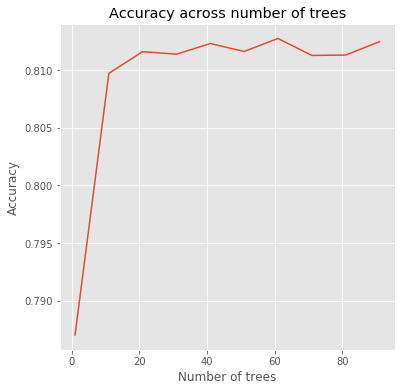

In [65]:
plt.figure(figsize=(6,6))
plt.plot(range(1,100,10),score_list)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy across number of trees')
plt.show()

##### Observations:
After k = 30  trees, we see that the accuracy are not much better despite adding more and more trees.
Now that we found a good numbers of trees, we lock that variable and search for different maximum depth of these trees what is the asscociated accuracy. 

We think that the depth of tree can also have an influence on the accuracy and on the comlplexity.
The highest number is not always the best.
In order to find the best compromise between computation and accuracy, we compute for different number of trees in the randomforest and we plot the result.

In [66]:

score_list = []
for k in range(1,10,1):
    randForest = RandomForestClassifier(n_estimators=30,max_depth=k)
    randForest = randForest.fit(X_train_st, y_train)
    scores = cross_val_score(randForest, X_train_st, y_train, cv=5)
    score_list.append(scores.mean() ) 

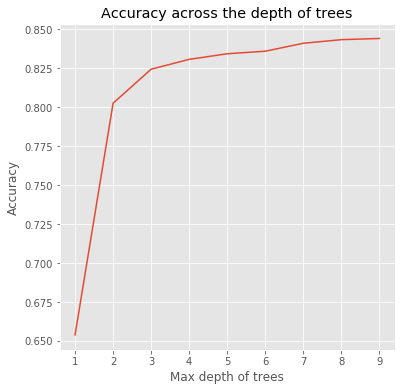

In [67]:
plt.figure(figsize=(6,6))
plt.plot( range(1,10,1),score_list)
plt.xlabel('Max depth of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy across the depth of trees')
plt.show()

##### Observations:
On the graph above , we can see that after a max depth of 7 the accuracy is not evolving that much. If we had limited ressources, we would pick  a max depth between 6 or 7, because the improvement is not significant above. Because we are not limited by the computational cost, we set our max depth to 10 for comparaison with the logistic regression.

In [68]:
def get_confusion_matrix_tree(X, y, threshold):
    predictions = randForest.predict(X)
    predictions[predictions<threshold] = 0
    predictions[predictions>=threshold] = 1
    return conf_matrix(predictions, y)


In [69]:
def get_performance_tree(X, y, threshold):
    N=len(y)
    N_true = np.sum(y)
    conf_matrix=get_confusion_matrix_tree(X, y, threshold)
    accuracy = (conf_matrix['true_positive']+conf_matrix['true_negative'])/N
    recall = (conf_matrix['true_positive'])/N_true
    precision = conf_matrix['true_positive'] / (conf_matrix['true_positive']+conf_matrix['false_positive'])
    F1 = 2*recall * precision/(recall+precision)
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'F1': F1}

In [70]:
get_confusion_matrix_tree(X_test_st, y_test, 0.5)

{'true_positive': 5895,
 'true_negative': 7569,
 'false_positive': 1606,
 'false_negative': 755}

In [71]:
get_performance_tree(X_test_st, y_test, 0.5)

{'accuracy': 0.8508056872037915,
 'precision': 0.7858952139714704,
 'recall': 0.8864661654135338,
 'F1': 0.8331566673733305}

Comparaison Logistic vs Random forest:

Accuracy:

Logistic:0.824  < Random forest: 0.847
<br><br>

precision;

Logistic:0.771  < Random forest: 0.778
<br><br>

recall:

Logistic:0.832  < Random forest: 0.893
<br><br>

F1: 

Logistic:0.800   < Random forest: 0.832



For this specific dataset the random forest model is a very good classifier and do accurate prediction.
Both algorithms are fast, random forest is really sensible to overfitting so the performance, really depends on the parameters.
The recall is much better for the random forest, for our problem the randomforest is more suited